In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from pathlib import Path

In [2]:
def load_starbucks_data(dpath, start_date, start_year):
    df = pd.read_csv(dpath)
    df.date = [pd.Timestamp(f"{start_year}-{x[0]}-{x[2:4]}") for x in df.date]
    df["days_after_start"] = [(d - pd.Timestamp(start_date)).days for d in df.date]
    df_mean = df.groupby(df.date).mean()
    return df, df_mean

def plot_sticker_prices(df, df_mean):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(df.date, df["mission"], 'd',
             color="#ff7f0e", label="Mission")
    plt.plot(df.date, df["normal"], 'd',
             color="#1f77b4", label='Normal')
    plt.plot(df_mean["mission"], color="#ff7f0e")
    plt.plot(df_mean["normal"], color="#1f77b4")
    plt.xticks(rotation=45)
    plt.legend()
    # plt.xlabel("date")
    plt.title("Price: mission & normal stickers")
    plt.ylabel("price(KRW)")
    plt.title("red & white sticker price")

In [3]:
sticker_path_2021 = Path("data/2021/starbucks_colored_sticker.csv")
sticker_path_2020 = Path("data/2020/starbucks_colored_sticker.csv")
ticket_path_2021 = Path("data/2021/starbucks_exchange_ticket.csv")
ticket_path_2020 = Path("data/2020/starbucks_exchange_ticket.csv")

df_2021, df_2021_mean = load_starbucks_data(sticker_path_2021,
                                            "2021-05-11", "2021")
df_2020, df_2020_mean = load_starbucks_data(sticker_path_2020,
                                            "2020-05-21", "2020")

df_ticket_2020, df_ticket_2020_mean = load_starbucks_data(ticket_path_2020,
                                                          "2020-05-21",
                                                          "2020")

df_ticket_2021, df_ticket_2021_mean = load_starbucks_data(ticket_path_2021,
                                                          "2021-05-11",
                                                          "2021")

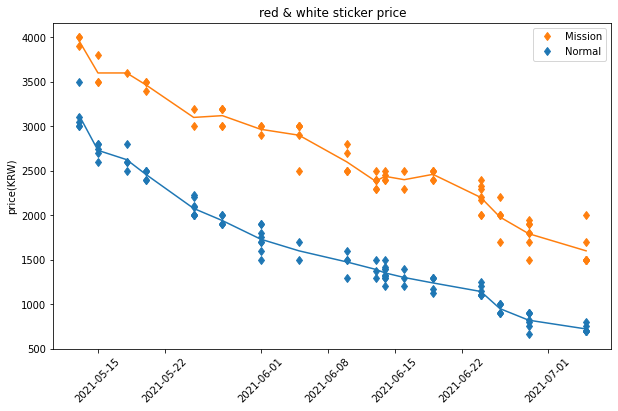

In [4]:
plot_sticker_prices(df_2021, df_2021_mean)

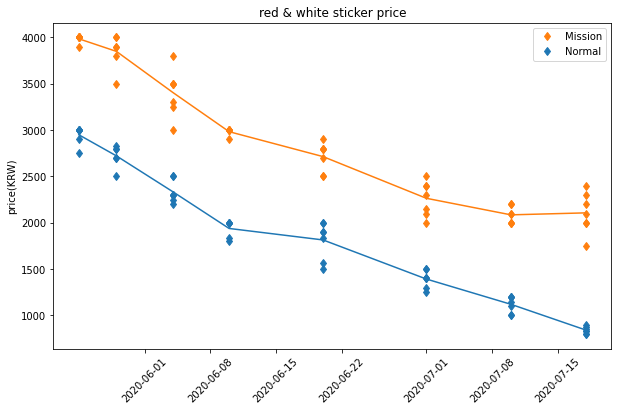

In [5]:
plot_sticker_prices(df_2020, df_2020_mean)

Text(0, 0.5, 'price(KRW)')

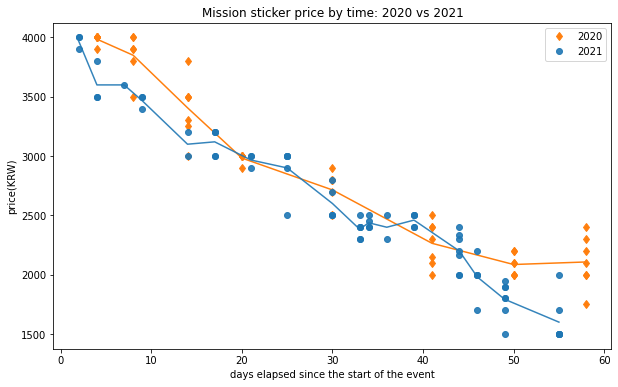

In [6]:
fig = plt.figure(figsize=(10, 6))
plt.plot(df_2020.days_after_start,
         df_2020["mission"], 'd',
         color="#ff7f0e", label="2020")
plt.plot(df_2020_mean.days_after_start,
         df_2020_mean.mission, color="#ff7f0e")

plt.plot(df_2021.days_after_start,
         df_2021["mission"],
         'o', color="#1f77b4", label="2021", alpha=0.9)
plt.plot(df_2021_mean.days_after_start,
         df_2021_mean.mission, color="#1f77b4" , alpha=0.9)

plt.legend()
plt.title("Mission sticker price by time: 2020 vs 2021")
plt.xlabel("days elapsed since the start of the event")
plt.ylabel("price(KRW)")

Text(0, 0.5, 'price(KRW)')

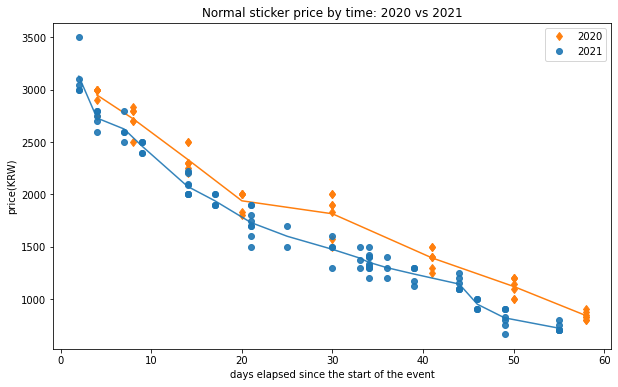

In [7]:

fig = plt.figure(figsize=(10, 6))
plt.plot(df_2020.days_after_start,
         df_2020["normal"], 'd',
         color="#ff7f0e", label="2020")
plt.plot(df_2020_mean.days_after_start,
         df_2020_mean["normal"], color="#ff7f0e")

plt.plot(df_2021.days_after_start,
         df_2021["normal"], 'o',
         color="#1f77b4", label="2021", alpha=0.9)
plt.plot(df_2021_mean.days_after_start,
         df_2021_mean["normal"], color="#1f77b4" , alpha=0.9)

plt.legend()

plt.title("Normal sticker price by time: 2020 vs 2021")
plt.xlabel("days elapsed since the start of the event")
plt.ylabel("price(KRW)")

Text(0.5, 0, 'days elapsed since the start of the event')

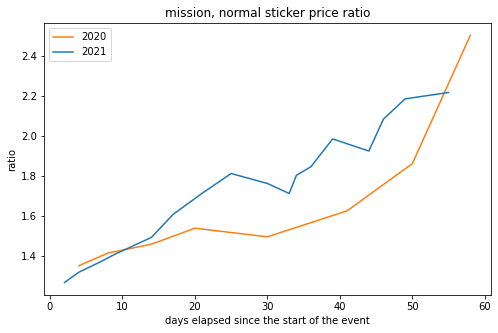

In [8]:
fig = plt.figure(figsize=(8, 5))
plt.title("mission, normal sticker price ratio")
plt.plot(df_2020_mean.days_after_start,
         df_2020_mean["mission"] / df_2020_mean["normal"],
         label="2020",
         color="#ff7f0e")
plt.plot(df_2021_mean.days_after_start,
         df_2021_mean["mission"] / df_2021_mean["normal"],
         label="2021",
         color = "#1f77b4")
plt.legend()
plt.ylabel("ratio")
plt.xlabel("days elapsed since the start of the event")

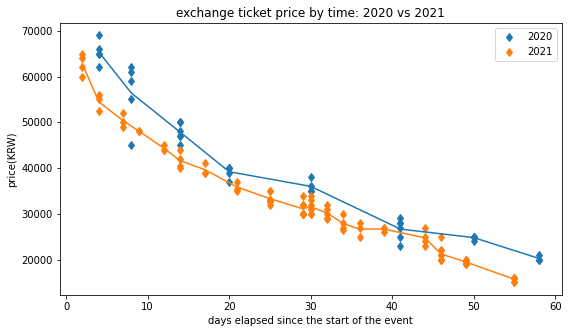

In [9]:
fig = plt.figure(figsize=(9, 5))
plt.title("exchange ticket price by time: 2020 vs 2021")
plt.plot(df_ticket_2020["days_after_start"],
         df_ticket_2020["price"] ,'d',
         c="#1f77b4", label="2020")
plt.plot(df_ticket_2021["days_after_start"],
         df_ticket_2021["price"] ,'d',
         c="#ff7f0e", label="2021")
plt.plot(df_ticket_2020_mean["days_after_start"],
         df_ticket_2020_mean["price"],c="#1f77b4")
plt.plot(df_ticket_2021_mean["days_after_start"],
         df_ticket_2021_mean["price"],c="#ff7f0e")

plt.ylabel("price(KRW)")
plt.xlabel("days elapsed since the start of the event")
plt.legend()